In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
pd.set_option('display.max_columns', None)
#Import the data and make it a dataframe
NPI_Data = pd.read_csv('data.csv')
NPI_Data = pd.DataFrame(NPI_Data)
NPI_Data = NPI_Data.drop(['score', 'elapse', 'gender', 'age', 'Q1', 'Q2', 'Q3', 'Q6', 'Q8', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q17', 'Q20', 'Q22', 'Q23', 'Q27', 'Q31', 'Q32', 'Q33', 'Q34', 'Q36', 'Q40'], 1)

Question_Change = ['Q4', 'Q5', 'Q15', 'Q18', 'Q19', 'Q26', 'Q35']
for word in Question_Change:
    NPI_Data[word] = NPI_Data[word].replace([2], 'y')
    NPI_Data[word] = NPI_Data[word].replace([1], 'n')
    NPI_Data[word] = NPI_Data[word].replace(['y'], 1)
    NPI_Data[word] = NPI_Data[word].replace(['n'], 2)

#Turn the data into a correlation matrix
NPI_Correlation = NPI_Data.corr().abs()
print(NPI_Correlation)

# Select upper triangle of correlation matrix
upper = NPI_Correlation.where(np.triu(np.ones(NPI_Correlation.shape), k=1).astype(bool))


# Find features with correlation greater than x
x = 0.5
to_drop = [column for column in upper.columns if any(upper[column] > x)]
print(to_drop)

# Drop features
NPI_Data.drop(to_drop, axis=1, inplace=True)

           Q4        Q5        Q7        Q9       Q15       Q16       Q18  \
Q4   1.000000  0.240457  0.254094  0.258597  0.215331  0.172769  0.211420   
Q5   0.240457  1.000000  0.147426  0.254571  0.113900  0.168308  0.227908   
Q7   0.254094  0.147426  1.000000  0.235692  0.233401  0.123424  0.221014   
Q9   0.258597  0.254571  0.235692  1.000000  0.149515  0.154803  0.284136   
Q15  0.215331  0.113900  0.233401  0.149515  1.000000  0.122193  0.141409   
Q16  0.172769  0.168308  0.123424  0.154803  0.122193  1.000000  0.122946   
Q18  0.211420  0.227908  0.221014  0.284136  0.141409  0.122946  1.000000   
Q19  0.219524  0.137642  0.182832  0.210694  0.495380  0.123486  0.169409   
Q21  0.242203  0.226083  0.109996  0.149862  0.107478  0.239819  0.120067   
Q24  0.210054  0.177089  0.113430  0.186540  0.100208  0.098258  0.184174   
Q25  0.260387  0.250162  0.200334  0.270111  0.135107  0.170644  0.321946   
Q26  0.364668  0.146298  0.257191  0.191469  0.209032  0.114414  0.159900   

                Q4        Q5        Q7        Q9       Q15       Q16  \
cluster                                                                
cluster1  1.063091  1.272555  1.056151  1.263091  1.174132  1.702208   
cluster2  1.690828  1.853550  1.826923  1.931213  1.564349  1.181213   
cluster3  1.154900  1.383306  1.879153  1.490449  1.290698  1.585133   
cluster4  1.195413  1.572936  0.999083  1.618349  1.218807  1.394495   
cluster5  1.033889  1.266272  1.022593  1.248252  1.055675  1.684508   

               Q19       Q21       Q23       Q24       Q25       Q26  \
cluster                                                                
cluster1  1.251104  1.899054  1.020189  1.838486  2.000000  2.000000   
cluster2  1.642012  1.384615  1.607249  1.352811  1.312870  1.937870   
cluster3  1.316445  1.862957  1.156561  1.731728  1.796512  1.605066   
cluster4  1.333028  1.616514  1.235321  1.525229  1.562385  1.511927   
cluster5  1.113502  1.896181  1.000000  1.808499  1.943249  1.1

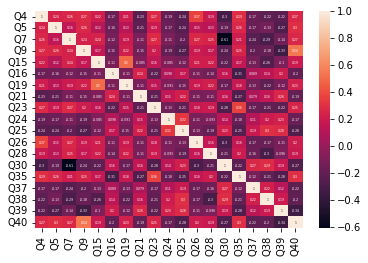

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import seaborn as sn
pd.set_option('display.max_columns', None)

cluster_data_soc_num = pd.read_csv('5ClustersFinal.csv')
cluster_data_soc_cat = cluster_data_soc_num.applymap(str)
x_socio = cluster_data_soc_num.iloc[:, 0:19]
y_socio = cluster_data_soc_num.iloc[:, 19]
x_train_soc, x_test_soc, y_train_soc, y_test_soc = train_test_split(
     x_socio, y_socio, test_size=0.45, random_state=0)
corr_matrix = x_socio.corr()
sn.heatmap(corr_matrix, annot=True, annot_kws={"size": 3})
plt.savefig('corr_matrix.png', dpi=300)
print(cluster_data_soc_num.groupby('cluster').mean())

array([[ 0.21228663,  0.24923179,  0.26200226,  0.31260092,  0.17515511,
        -0.20544724,  0.19789504, -0.17227659,  0.17881874, -0.18148678,
        -0.2227434 ,  0.23299794,  0.16288611, -0.28742926,  0.24852357,
        -0.19436341, -0.17469448, -0.26377891,  0.32729426],
       [ 0.0598287 , -0.24569268,  0.38576461, -0.18202905,  0.24684107,
         0.21456333,  0.20780841,  0.19247125,  0.00157911,  0.19333093,
         0.13845037,  0.34346147,  0.14167201, -0.36285037, -0.15911229,
        -0.16982591, -0.10460907,  0.38382685, -0.16804947]])

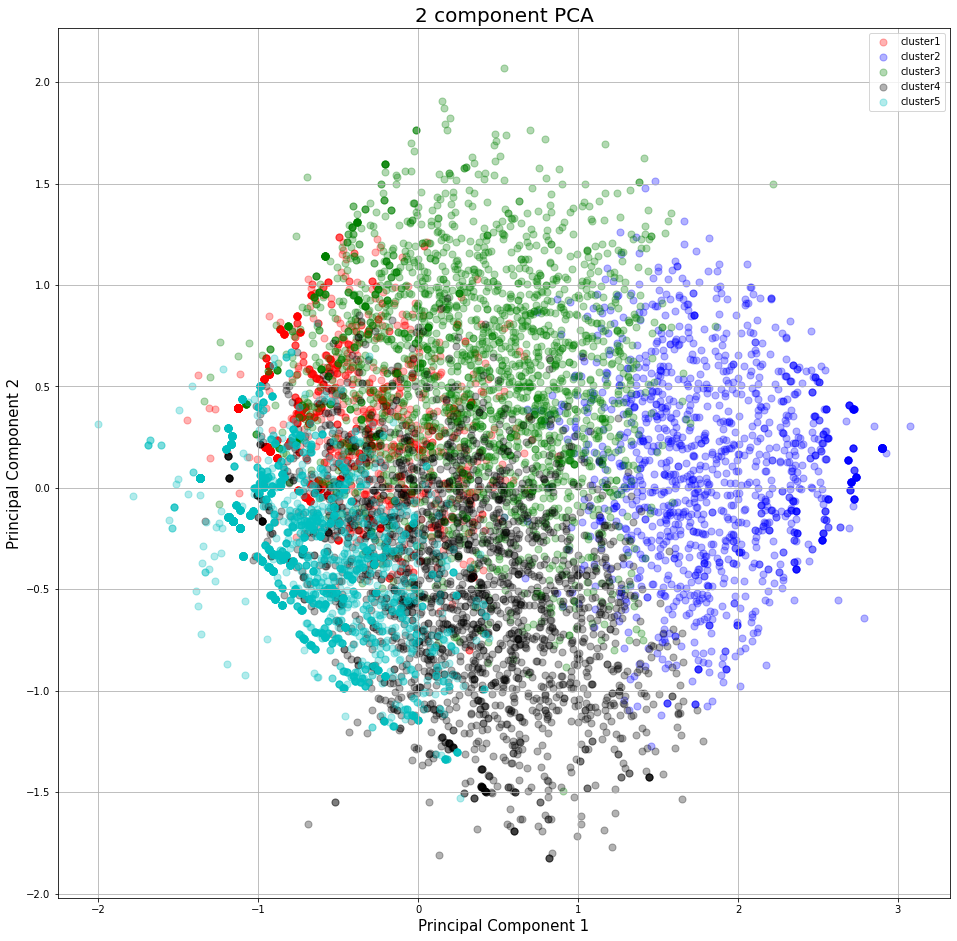

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_socio)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_socio], axis = 1)

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']
colors = ['r', 'b', 'g', 'k', 'c']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.3
               , s = 50)
ax.legend(targets)
ax.grid()
pca.components_

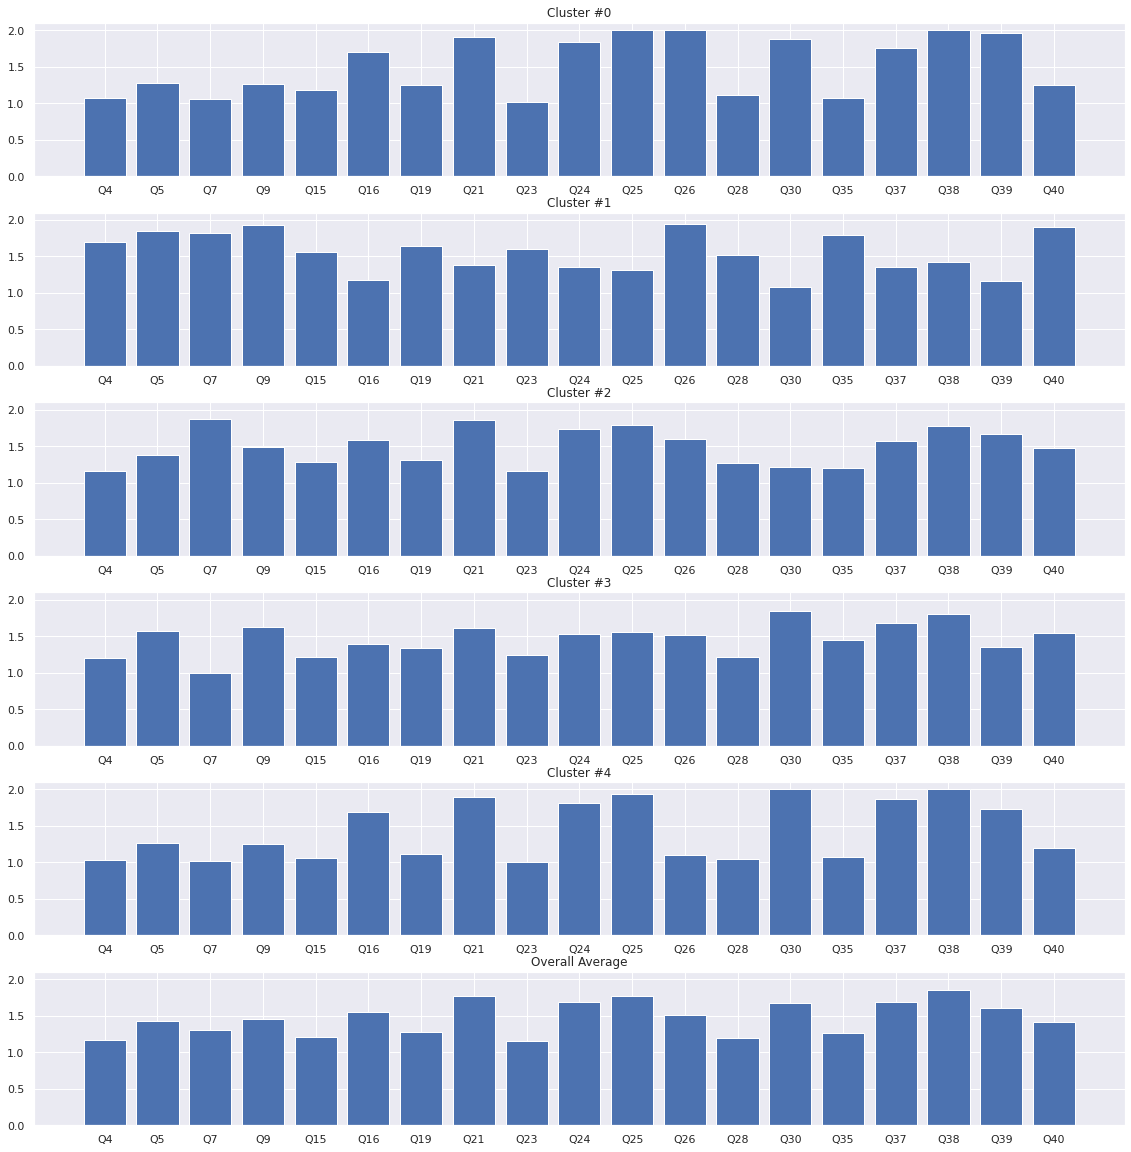

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style

sns.set(style = "darkgrid")
df_red_clust = pd.read_csv('5ClustersFinal.csv')
red_means = df_red_clust.groupby('cluster').mean()
n_clusters = len(red_means)
fig, axs = plt.subplots(n_clusters +1, 1, figsize = (16, 16), sharey = True)
fig.tight_layout()
for i in range(len(red_means)):
    cl = red_means.iloc[i]
    axs[i].bar(list(cl.keys()), list(cl[list(cl.keys())]))
    axs[i].set_title('Cluster #' + str(i))
overall_avg = df_red_clust.mean(axis = 0)
axs[n_clusters].bar(list(overall_avg.keys()), list(overall_avg[list(overall_avg.keys())]))
axs[n_clusters].set_title('Overall Average')
plt.show()

Minimum error:- 0.176513671875 at K = 601
0.8060302734375


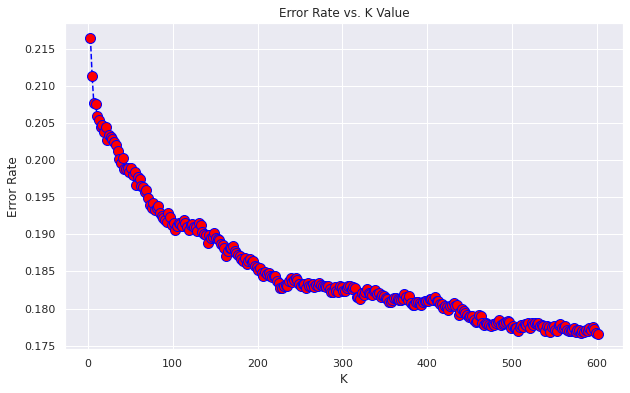

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style

l = [(2 * i) + 1 for i in range(1, 301)]
error_rate = []

training = pd.read_csv('training_data_labeled_final_v2.csv')
testing = pd.read_csv('testing_labeled_new.csv')
y_train = training.iloc[:, 10].copy()
normalized_training = (training-training.mean())/training.std().copy()
y_test = testing.iloc[:, 10].copy()
normalized_testing = (testing-testing.mean())/testing.std().copy()
x_test = normalized_testing.iloc[:, 0:10]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import PrecisionRecallDisplay
x_train = normalized_training.iloc[:, 0:10]

for i in l:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(l, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-", min(error_rate), "at K =", 2*req_k_value + 1)


knn = KNeighborsClassifier(n_neighbors = 73)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 89)
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train))

0.9256


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


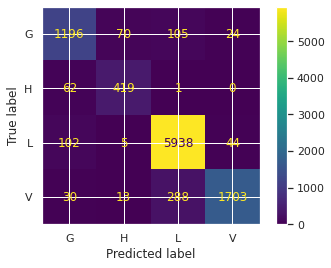

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(knn, x_train, y_train)

In [ ]:
#prints % that of sample that each cluster represents in ascending order
total = len(df_red_clust)
cluster_groups = df_red_clust.groupby('cluster')
n_clusters = len(cluster_groups)
cluster_sizes = np.array([0]*n_clusters)
for i in range(n_clusters):
    cluster_sizes[i] = df_red_clust.groupby('cluster').count().iloc[i, 0]
cluster_percents = (cluster_sizes / total) * 100
print(cluster_percents)

[14.09766077 12.02526016 21.41777106 19.38984257 33.06946545]


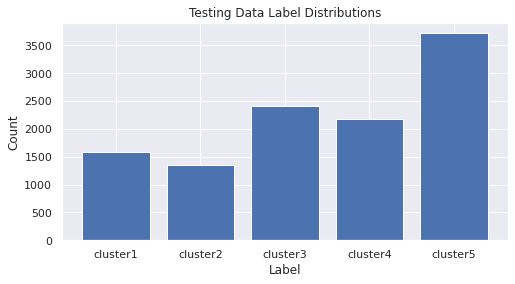

In [ ]:
df_test = pd.read_csv('5ClustersFinal.csv')
df_train = pd.read_csv('5ClustersFinal.csv')
fig, axs = plt.subplots(figsize=(8, 4))
classes = df_test.groupby('cluster').count().iloc[:, 0]
axs.bar(list(classes.keys()), list(classes.loc[classes.keys()]))
plt.ylabel('Count')
plt.xlabel('Label')
plt.title('Testing Data Label Distributions')
plt.show()